# Assignment 1
## Fabian Hansch Mauritzson
### Problem 1
### 1) Bag-of-Words

In [32]:
import pandas as pd
df_news = pd.read_csv("News_Article_2016_Jan.csv", nrows = 5000)
df_news.head()

,Day,Name,Year,month,Content
0,21,3D SYSTEMS,2016,January,Plastics ...
1,11,3D SYSTEMS,2016,January,US Officia...
2,12,3D SYSTEMS,2016,January,Progressive Media ...
3,1,3D SYSTEMS,2016,January,Stock Wat...
4,18,3D SYSTEMS,2016,January,India Automobi...


In [33]:
content_list = df_news["Content"]
content = " ".join(content_list)


In [34]:
type(content)

str

In [35]:
import nltk
from nltk import FreqDist
tokens = nltk.word_tokenize(content)
tokens

['Plastics',
 'News',
 'Print',
 'Version',
 'January',
 '18',
 ',',
 '2016',
 '3-D',
 'printing',
 'and',
 'surgery',
 'a',
 "'paradigm",
 'shift',
 "'",
 'BYLINE',
 ':',
 'Caroline',
 'Lewis',
 'SECTION',
 ':',
 'Pg',
 '.',
 '13',
 'Vol',
 '.',
 '27',
 'LENGTH',
 ':',
 '1608',
 'words',
 'DATELINE',
 ':',
 'New',
 'York',
 'Zeesy',
 'Stern',
 'lay',
 'unconscious',
 'on',
 'an',
 'operating',
 'table',
 'at',
 'New',
 'York',
 'University',
 'Langone',
 'Medical',
 'Center',
 'as',
 'a',
 'surgeon',
 'removed',
 'a',
 'section',
 'of',
 'her',
 'jaw',
 'where',
 'a',
 'golf-ball-size',
 'tumor',
 'had',
 'begun',
 'to',
 'displace',
 'the',
 'teeth',
 'on',
 'the',
 'left',
 'side',
 'of',
 'her',
 'mouth',
 '.',
 'Another',
 'doctor',
 ',',
 'meanwhile',
 ',',
 'worked',
 'to',
 'extract',
 'a',
 'piece',
 'of',
 'her',
 'fibula',
 'that',
 'would',
 'be',
 'fitted',
 'like',
 'a',
 'puzzle',
 'piece',
 'into',
 'the',
 'space',
 'where',
 'her',
 'jaw',
 'once',
 'was',
 '.',
 'The

In [36]:
words1 = []
for w in tokens: 
    words1.append(w.lower())

In [37]:
words2 = []
for w in words1:
    if w.isalpha():
        words2.append(w)

In [38]:
freq = FreqDist(words2)

sorted_freq = sorted(freq.items(), key = lambda k:k[1], reverse = True)
sorted_freq[:30]

[('the', 162803),
 ('of', 85392),
 ('and', 80910),
 ('to', 79263),
 ('a', 60889),
 ('in', 59270),
 ('for', 34165),
 ('that', 25474),
 ('is', 24828),
 ('on', 22541),
 ('at', 20642),
 ('with', 20201),
 ('by', 17043),
 ('as', 16781),
 ('it', 15595),
 ('was', 13284),
 ('from', 13223),
 ('said', 12731),
 ('be', 12497),
 ('january', 12127),
 ('are', 11693),
 ('or', 11665),
 ('has', 11318),
 ('will', 10948),
 ('this', 10754),
 ('an', 10661),
 ('he', 9547),
 ('its', 9140),
 ('company', 9087),
 ('all', 8964)]

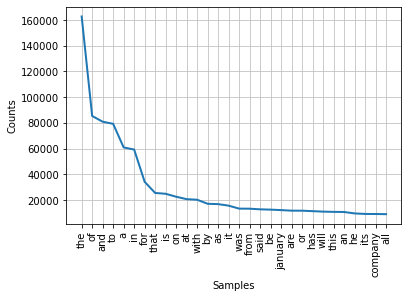

In [39]:
freq.plot(30)

### 2) Bag-of-Words with Stemming and Stopwords

In [40]:
from nltk.corpus import stopwords

stopwords = stopwords.words("english")

In [41]:
non_stop = []
for w in words2:
    if w not in stopwords:
        non_stop.append(w)

#non_stop[:10]

In [42]:
porter = nltk.PorterStemmer()
stem = []
for w in non_stop:
    stem.append(porter.stem(w))
    
#stem

In [43]:
freq_stem = FreqDist(stem)
sorted_freq_stem = sorted(freq_stem.items(), key = lambda k:k[1], reverse = True)
sorted_freq_stem[:30]

[('said', 12731),
 ('januari', 12127),
 ('compani', 11633),
 ('year', 9076),
 ('servic', 7731),
 ('new', 7561),
 ('market', 7369),
 ('right', 5900),
 ('also', 5480),
 ('word', 5377),
 ('english', 5354),
 ('state', 5330),
 ('languag', 5236),
 ('time', 5202),
 ('news', 5072),
 ('length', 5064),
 ('copyright', 5042),
 ('busi', 4874),
 ('reserv', 4821),
 ('includ', 4772),
 ('million', 4701),
 ('one', 4618),
 ('report', 4513),
 ('provid', 4402),
 ('file', 4338),
 ('would', 4198),
 ('first', 4021),
 ('use', 4016),
 ('public', 3990),
 ('newspap', 3786)]

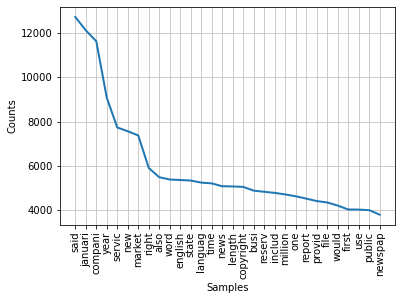

In [44]:
freq_stem.plot(30)

### 3) POS on All Nouns

In [45]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\fabia\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [48]:
pos_tags = nltk.pos_tag(tokens)
pos_tag_list = []
for (word,tag) in pos_tags:
    if tag.startswith("N"):
        pos_tag_list.append((word,tag))

In [49]:
tag_freq = FreqDist(pos_tag_list)
sorted_tag_freq = sorted(tag_freq.items(), key = lambda k:k[1], reverse = True)

In [51]:
sorted_tag_freq[:30]

[(('January', 'NNP'), 12016),
 (('%', 'NN'), 6264),
 (('year', 'NN'), 5349),
 (('words', 'NNS'), 5189),
 (('company', 'NN'), 5093),
 (('Copyright', 'NNP'), 5001),
 (('LANGUAGE', 'NN'), 5000),
 (('LOAD-DATE', 'NN'), 4525),
 (('All', 'NNP'), 4401),
 (('*', 'NNP'), 4369),
 (('Inc.', 'NNP'), 4264),
 (('Rights', 'NNP'), 4054),
 (('PUBLICATION-TYPE', 'NN'), 3827),
 (('market', 'NN'), 3677),
 (('LENGTH', 'NNP'), 3313),
 (('services', 'NNS'), 3171),
 (('LLC', 'NNP'), 3164),
 (('years', 'NNS'), 3141),
 (('Inc', 'NNP'), 3140),
 (('time', 'NN'), 3110),
 (('News', 'NNP'), 3045),
 (('Company', 'NNP'), 3008),
 (('business', 'NN'), 2786),
 (('Jan.', 'NNP'), 2764),
 (('percent', 'NN'), 2648),
 (('New', 'NNP'), 2638),
 (('A', 'NNP'), 2457),
 (('@', 'NNP'), 2265),
 (('BYLINE', 'NNP'), 2235),
 (('SECTION', 'NN'), 2202)]

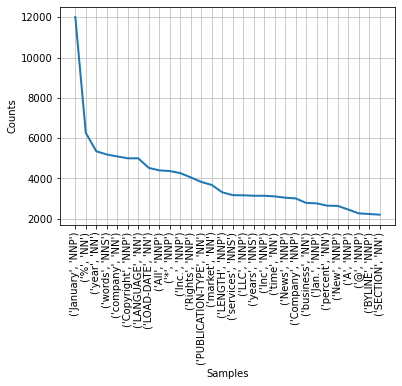

In [53]:
tag_freq.plot(30)

### 4) POS but Only NNP

In [54]:
nnp_tag_list = []
for (word,tag) in pos_tags:
    if tag.startswith("NNP"):
        nnp_tag_list.append((word,tag))

In [55]:
nnp_freq = FreqDist(nnp_tag_list)
sorted_nnp_freq = sorted(nnp_freq.items(), key = lambda k:k[1], reverse = True)

In [56]:
sorted_nnp_freq[:30]

[(('January', 'NNP'), 12016),
 (('Copyright', 'NNP'), 5001),
 (('All', 'NNP'), 4401),
 (('*', 'NNP'), 4369),
 (('Inc.', 'NNP'), 4264),
 (('Rights', 'NNP'), 4054),
 (('LENGTH', 'NNP'), 3313),
 (('LLC', 'NNP'), 3164),
 (('Inc', 'NNP'), 3140),
 (('News', 'NNP'), 3045),
 (('Company', 'NNP'), 3008),
 (('Jan.', 'NNP'), 2764),
 (('New', 'NNP'), 2638),
 (('A', 'NNP'), 2457),
 (('@', 'NNP'), 2265),
 (('BYLINE', 'NNP'), 2235),
 (('December', 'NNP'), 2165),
 (('U.S.', 'NNP'), 2162),
 (('J', 'NNP'), 2093),
 (('County', 'NNP'), 2078),
 (('Group', 'NNP'), 2056),
 (('Newspaper', 'NNP'), 2033),
 (('Commission', 'NNP'), 1980),
 (('US', 'NNP'), 1951),
 (('Friday', 'NNP'), 1674),
 (('Wednesday', 'NNP'), 1669),
 (('St.', 'NNP'), 1633),
 (('Pg', 'NNP'), 1625),
 (('Media', 'NNP'), 1621),
 (('North', 'NNP'), 1619)]

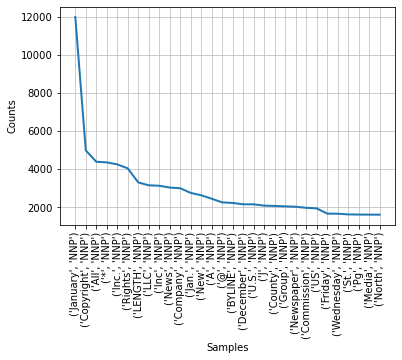

In [57]:
nnp_freq.plot(30)

## Problem 2

In [142]:
df_news_long = pd.read_csv("News_Article_2016_Jan.csv")

df_two = df_news_long.loc[(df_news_long["Name"]=="GOOGLE") | (df_news_long["Name"]=="YAHOO")]

In [143]:
df_two1 = df_two.loc[df_two["Day"] <= 7]
df_two2 = df_two.loc[(df_two["Day"] > 7) & (df_two["Day"] <= 14)]
df_two3 = df_two.loc[(df_two["Day"] > 14) & (df_two["Day"] <= 21)]
df_two4 = df_two.loc[(df_two["Day"] > 21) & (df_two["Day"] <= 28)]
df_two5 = df_two.loc[df_two["Day"] > 28]

In [144]:
content_list1 = df_two1["Content"]
content1 = " ".join(content_list1)

content_list2 = df_two2["Content"]
content2 = " ".join(content_list2)

content_list3 = df_two3["Content"]
content3 = " ".join(content_list3)

content_list4 = df_two4["Content"]
content4 = " ".join(content_list4)

content_list5 = df_two5["Content"]
content5 = " ".join(content_list5)

In [145]:
tokens1 = nltk.word_tokenize(content1)
tokens2 = nltk.word_tokenize(content2)
tokens3 = nltk.word_tokenize(content3)
tokens4 = nltk.word_tokenize(content4)
tokens5 = nltk.word_tokenize(content5)

In [146]:
words_1 = []
for w in tokens1: 
    words_1.append(w.lower())
    
words_2 = []
for w in tokens2: 
    words_2.append(w.lower())

words_3 = []
for w in tokens3: 
    words_3.append(w.lower())

words_4 = []
for w in tokens4: 
    words_4.append(w.lower())
    
words_5 = []
for w in tokens5: 
    words_5.append(w.lower())

In [147]:
alpha1 = []
for w in words_1:
    if w.isalpha():
        alpha1.append(w)
        
alpha2 = []
for w in words_2:
    if w.isalpha():
        alpha2.append(w)
        
alpha3 = []
for w in words_3:
    if w.isalpha():
        alpha3.append(w)
        
alpha4 = []
for w in words_4:
    if w.isalpha():
        alpha4.append(w)
        
alpha5 = []
for w in words_5:
    if w.isalpha():
        alpha5.append(w)

In [148]:
non_stop1 = []
for w in alpha1:
    if w not in stopwords:
        non_stop1.append(w)
        
non_stop2 = []
for w in alpha2:
    if w not in stopwords:
        non_stop2.append(w)
        
non_stop3 = []
for w in alpha3:
    if w not in stopwords:
        non_stop3.append(w)
        
non_stop4 = []
for w in alpha4:
    if w not in stopwords:
        non_stop4.append(w)
        
non_stop5 = []
for w in alpha5:
    if w not in stopwords:
        non_stop5.append(w)

In [149]:
stem1 = []
for w in non_stop1:
    stem1.append(porter.stem(w))
    
stem2 = []
for w in non_stop2:
    stem2.append(porter.stem(w))

stem3 = []
for w in non_stop3:
    stem3.append(porter.stem(w))
    
stem4 = []
for w in non_stop4:
    stem4.append(porter.stem(w))
    
stem5 = []
for w in non_stop5:
    stem5.append(porter.stem(w))

In [150]:
freq_stem1 = FreqDist(stem1)
sorted_freq_stem1 = sorted(freq_stem1.items(), key = lambda k:k[1], reverse = True)
print(sorted_freq_stem1[:30])

[('yahoo', 190), ('compani', 58), ('starboard', 47), ('januari', 42), ('mayer', 42), ('busi', 40), ('said', 39), ('video', 31), ('year', 31), ('board', 30), ('new', 28), ('servic', 23), ('googl', 23), ('sharehold', 23), ('wednesday', 22), ('word', 22), ('manag', 22), ('million', 21), ('chang', 21), ('investor', 21), ('user', 20), ('includ', 20), ('length', 19), ('screen', 19), ('languag', 19), ('english', 19), ('copyright', 19), ('right', 19), ('reserv', 19), ('valu', 19)]


In [151]:
freq_stem2 = FreqDist(stem2)
sorted_freq_stem2 = sorted(freq_stem2.items(), key = lambda k:k[1], reverse = True)
print(sorted_freq_stem2[:30])

[('yahoo', 80), ('googl', 57), ('compani', 27), ('busi', 26), ('januari', 22), ('plan', 15), ('includ', 15), ('report', 14), ('would', 14), ('said', 14), ('also', 14), ('make', 13), ('develop', 13), ('word', 12), ('chang', 12), ('year', 12), ('right', 12), ('mayer', 11), ('core', 11), ('english', 11), ('newspap', 11), ('scan', 11), ('plaintiff', 11), ('length', 10), ('investor', 10), ('take', 10), ('languag', 10), ('copyright', 10), ('settlement', 10), ('starboard', 9)]


In [152]:
freq_stem3 = FreqDist(stem3)
sorted_freq_stem3 = sorted(freq_stem3.items(), key = lambda k:k[1], reverse = True)
print(sorted_freq_stem3[:30])

[('yahoo', 44), ('googl', 39), ('said', 20), ('compani', 15), ('map', 13), ('januari', 12), ('valu', 11), ('canyon', 10), ('capit', 10), ('letter', 10), ('court', 10), ('right', 9), ('virtual', 9), ('realiti', 9), ('imag', 9), ('sharehold', 8), ('instal', 8), ('sensit', 8), ('length', 7), ('board', 7), ('includ', 7), ('manag', 7), ('detail', 7), ('user', 7), ('settlement', 7), ('provid', 7), ('sharma', 7), ('media', 6), ('word', 6), ('team', 6)]


In [153]:
freq_stem4 = FreqDist(stem4)
sorted_freq_stem4 = sorted(freq_stem4.items(), key = lambda k:k[1], reverse = True)
print(sorted_freq_stem4[:30])

[('googl', 106), ('yahoo', 97), ('compani', 61), ('ivori', 54), ('softwar', 38), ('comput', 38), ('japan', 37), ('servic', 35), ('said', 34), ('search', 33), ('trade', 29), ('internet', 28), ('year', 28), ('januari', 26), ('product', 26), ('site', 26), ('appl', 26), ('trademark', 24), ('sale', 23), ('oper', 22), ('market', 21), ('copyright', 21), ('eleph', 19), ('billion', 18), ('court', 18), ('report', 17), ('us', 16), ('system', 16), ('oracl', 16), ('applic', 16)]


In [154]:
freq_stem5 = FreqDist(stem5)
sorted_freq_stem5 = sorted(freq_stem5.items(), key = lambda k:k[1], reverse = True)
print(sorted_freq_stem5[:30])

[('googl', 22), ('app', 20), ('adword', 13), ('yahoo', 10), ('mobil', 9), ('news', 7), ('januari', 6), ('homepag', 6), ('reward', 6), ('campaign', 6), ('revamp', 5), ('reveal', 5), ('releas', 5), ('user', 5), ('use', 5), ('manag', 5), ('ved', 5), ('io', 4), ('interest', 4), ('devic', 4), ('web', 4), ('error', 4), ('secur', 4), ('appl', 4), ('market', 4), ('length', 3), ('word', 3), ('give', 3), ('compani', 3), ('also', 3)]
